In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Model Accuracy: 0.9700
AUC Score: 1.0000


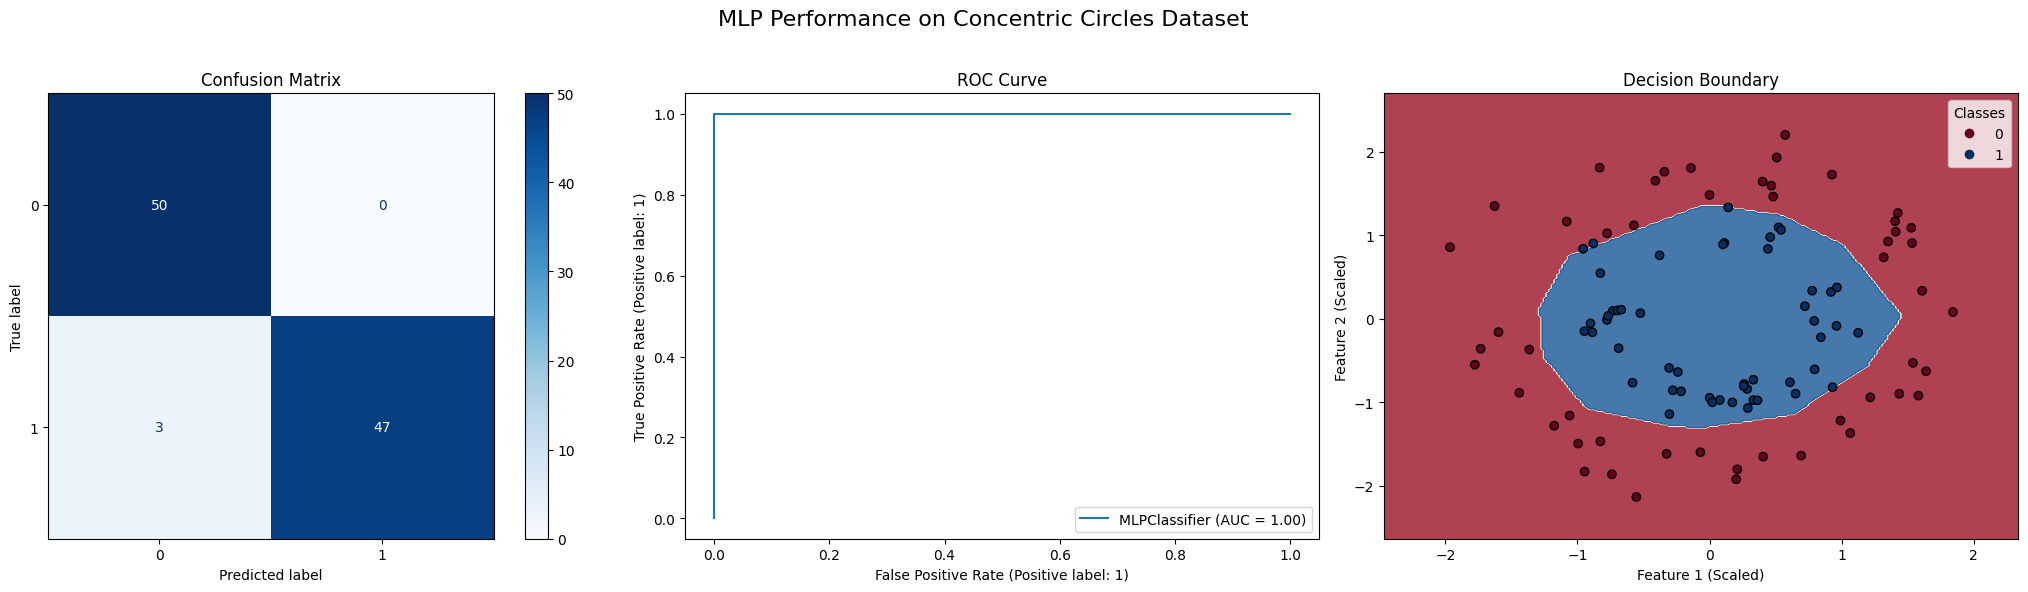

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay,roc_auc_score
X,y=make_circles(n_samples=500,noise=0.1,factor=0.5,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
mlp=MLPClassifier(hidden_layer_sizes=(10,5),activation='relu',solver='adam',max_iter=1000,random_state=42)
mlp.fit(X_train_scaled,y_train)
y_pred=mlp.predict(X_test_scaled)
accuracy=mlp.score(X_test_scaled,y_test)
auc_score=roc_auc_score(y_test,mlp.predict_proba(X_test_scaled)[:,1])
print(f"Model Accuracy: {accuracy:.4f}")
print(f"AUC Score: {auc_score:.4f}")
fig,axes=plt.subplots(1,3,figsize=(21,6))
plt.suptitle("MLP Performance on Concentric Circles Dataset",fontsize=16)
ConfusionMatrixDisplay.from_estimator(mlp,X_test_scaled,y_test,cmap='Blues',ax=axes[0])
axes[0].set_title('Confusion Matrix')
RocCurveDisplay.from_estimator(mlp,X_test_scaled,y_test,ax=axes[1])
axes[1].set_title('ROC Curve')
h=.02
x_min,x_max=X_test_scaled[:,0].min()-0.5,X_test_scaled[:,0].max()+0.5
y_min,y_max=X_test_scaled[:,1].min()-0.5,X_test_scaled[:,1].max()+0.5
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z=mlp.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
axes[2].contourf(xx,yy,Z,cmap=plt.cm.RdBu,alpha=0.8)
scatter=axes[2].scatter(X_test_scaled[:,0],X_test_scaled[:,1],c=y_test,cmap=plt.cm.RdBu,edgecolors='k')
axes[2].set_title('Decision Boundary')
axes[2].set_xlabel('Feature 1 (Scaled)')
axes[2].set_ylabel('Feature 2 (Scaled)')
axes[2].legend(*scatter.legend_elements(),title="Classes")
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()